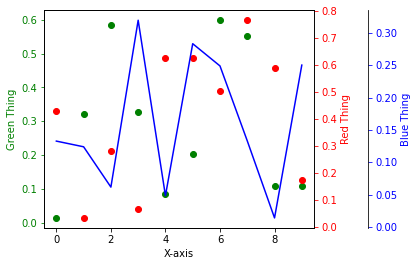

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# To make things reproducible...
np.random.seed(1977)

fig, ax = plt.subplots()

# Twin the x-axis twice to make independent y-axes.
axes = [ax, ax.twinx(), ax.twinx()]

# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# Move the last y-axis spine over to the right by 20% of the width of the axes
axes[-1].spines['right'].set_position(('axes', 1.2))

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
axes[-1].set_frame_on(True)
axes[-1].patch.set_visible(False)

# And finally we get to plot things...
colors = ('Green', 'Red', 'Blue')
for ax, color in zip(axes, colors):
    data = np.random.random(1) * np.random.random(10)
    if color == "Blue":
        ax.plot(data, color=color)
    else:
        ax.plot(data, marker='o', linestyle='none', color=color)
    ax.set_ylabel('%s Thing' % color, color=color)
    ax.tick_params(axis='y', colors=color)
axes[0].set_xlabel('X-axis')

plt.show()

In [5]:
import pandas as pd

file_distance = "/Users/audi/Downloads/data visualisation needed/example data chr distance to spindle equator.xlsx"
file_length = "/Users/audi/Downloads/data visualisation needed/example data spindle length.xlsx"

df_distance = pd.read_excel(file_distance)
df_length = pd.read_excel(file_length)

df_distance = df_distance.set_index(df_distance.columns[0])
df_length = df_length.set_index(df_length.columns[0])

def clean(x):
    if isinstance(x, str):
        return np.nan
    return x
df_distance = df_distance.applymap(clean)
df_length = df_length.applymap(clean)
distance_means = df_distance.mean(axis=1, skipna=True)
distance_stds = df_distance.std(axis=1, skipna=True)
length_means = df_length.mean(axis=1, skipna=True)
length_stds = df_length.std(axis=1, skipna=True)

In [8]:
from matplotlib.colors import LinearSegmentedColormap
def hex_to_rgb(value):
    '''
    Converts hex to rgb colours
    value: string of 6 characters representing a hex colour.
    Returns: list length 3 of RGB values'''
    value = value.strip("#") # removes hash symbol if present
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))


def rgb_to_dec(value):
    '''
    Converts rgb to decimal colours (i.e. divides each value by 256)
    value: list (length 3) of RGB values
    Returns: list (length 3) of decimal values'''
    return [v/256 for v in value]

def get_continuous_cmap(hex_list, float_list=None):
    ''' creates and returns a color map that can be used in heat map figures.
        If float_list is not provided, colour map graduates linearly between each color in hex_list.
        If float_list is provided, each color in hex_list is mapped to the respective location in float_list. 
        
        Parameters
        ----------
        hex_list: list of hex code strings
        float_list: list of floats between 0 and 1, same length as hex_list. Must start with 0 and end with 1.
        
        Returns
        ----------
        colour map'''
    rgb_list = [rgb_to_dec(hex_to_rgb(i)) for i in hex_list]
    if len(float_list) > 0:
        pass
    else:
        float_list = list(np.linspace(0,1,len(rgb_list)))
        
    cdict = dict()
    for num, col in enumerate(['red', 'green', 'blue']):
        col_list = [[float_list[i], rgb_list[i][num], rgb_list[i][num]] for i in range(len(float_list))]
        cdict[col] = col_list
    cmp = LinearSegmentedColormap('my_cmp', segmentdata=cdict, N=256)
    return cmp

In [9]:
hex_list = [
    "#FEFAE0",
    "#FFE66D",
    "#FCBF49",
    "#FFBA08",
    "#FAA307",
    "#F48C06",
    "#E85D04",
    "#DC2F02",
    "#D00000",
    "#9D0208",
    "#6A040F",
    "#370617",
    "#03071E"
]
hex_list = hex_list + hex_list[:-1][::-1]
proportion_list = [
    4,4,4,3,3,3,3,2,2,2,2,1
]
proportion_list = proportion_list + proportion_list[::-1]
float_list = [0]
for i in proportion_list:
    float_list.append(float_list[-1] + i/(sum(proportion_list)))
float_list[-1] = 1.0
assert(len(hex_list) == len(float_list))
distance_cmap = get_continuous_cmap(hex_list, float_list)

In [20]:
distance_config = {
    "type": "scatter",
    "data": df_distance,
    "data_error": df_distance,
    "color": "orange",
    "error_color": "orange",
    "colormap": distance_cmap,
    "border_color": "face",
    "show_colorbar": True,
    "min_value": -3,
    "max_value": 3,
    "ylim": (-5, 5),
    "ylabel": "Distance",
    "ylabel_size": 10.0,
    "ylabel_color": "red",
    "yticks_size": 10.0,
    "yticks_interval": 1.0,
    "yticks_color": "green",
    "marker": 'o',
    "marker_size": 2.0,
    "line_size": 2.0,
    "line_style": "solid",
    "error_line_size": 2.0
}

In [75]:
def plot_scatter(
    fig = fig,
    ax = ax,
    config = distance_config
) :
    df = config["data"]
    y = df.index
    for i in range(len(df.columns)):
        x = df[df.columns[i]]
        sc = ax.scatter(
            y,
            x,
            c=x,
            label=df.columns[i],
            cmap=config["colormap"],
            marker=config["marker"],
            s=config["marker_size"],
            vmin=config["min_value"],
            vmax=config["max_value"],
            edgecolors=config["border_color"],
        )

    ax.set_ylabel(config["ylabel"], 
                  size=config["ylabel_size"], 
                  color=config["ylabel_color"])
    ax.tick_params(axis='y', 
                   colors=config["yticks_color"], 
                   size=config["yticks_size"])
    ax.set_ylim(config["ylim"])

    if config["show_colorbar"]:
        fig.colorbar(sc, orientation="horizontal")
#         , aspect=40)
#         , anchor=(0, 0))
#         , fraction=0.1, aspect=30)

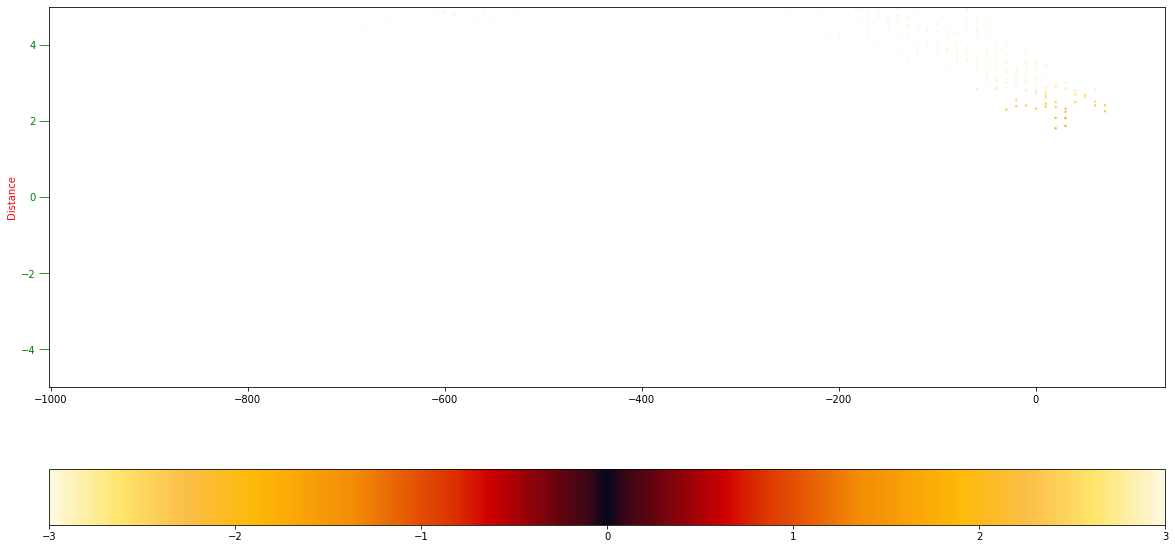

In [76]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_scatter(fig, ax, distance_config)
plt.show()

In [77]:
def plot_line(
    fig = fig,
    ax = ax,
    config = distance_config
) :
    df = config["data"]
    y = df.index
    for i in range(len(df.columns)):
        x = df[df.columns[i]]
        sc = ax.plot(
            y,
            x,
            label=df.columns[i],
            marker=config["marker"],
            linestyle=config["line_style"],
            linewidth=config["line_size"], 
            markersize=config["marker_size"],
            color=config["color"]
        )

    ax.set_ylabel(config["ylabel"], 
                  size=config["ylabel_size"], 
                  color=config["ylabel_color"])
    ax.tick_params(axis='y', 
                   colors=config["yticks_color"], 
                   size=config["yticks_size"])
    ax.set_ylim(config["ylim"])

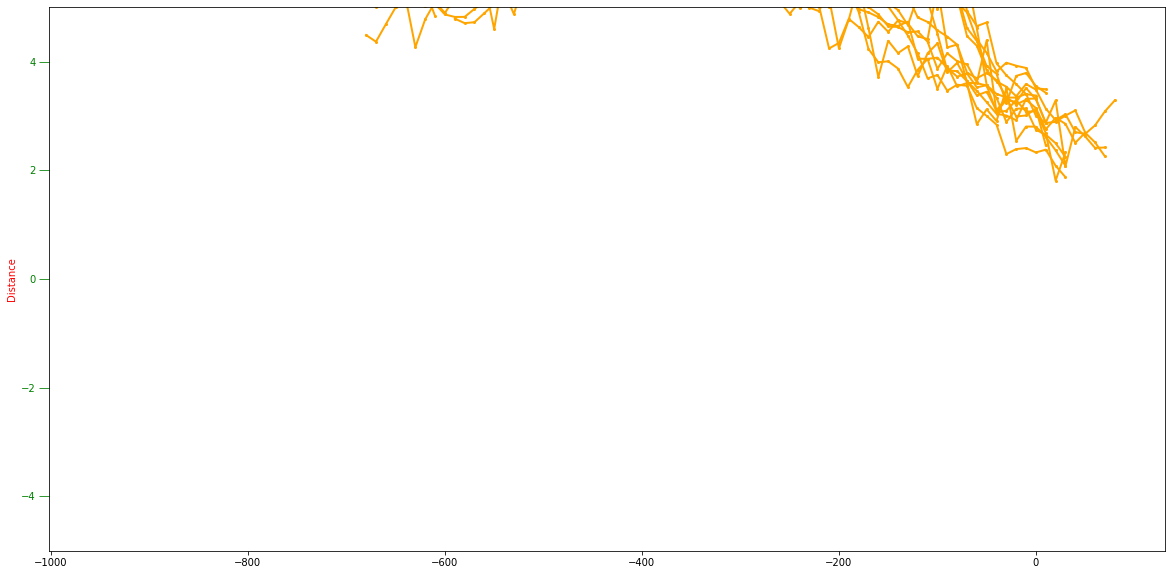

In [78]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_line(fig, ax, distance_config)
plt.show()

In [79]:
def plot_errorbar(
    fig = fig,
    ax = ax,
    config = distance_config
) :
    df = config["data"]
    y = df.index
    df_error = config["data_error"]
    for i in range(len(df.columns)):
        x = df[df.columns[i]]
        yerr = df_error[df.columns[i]]
        sc = ax.errorbar(
            y,
            x,
            label=df.columns[i],
            marker=config["marker"],
            linestyle=config["line_style"],
            linewidth=config["line_size"], 
            markersize=config["marker_size"],
            yerr=yerr,
            color=config["color"],
            elinewidth=config["error_line_size"],
            ecolor=config["error_color"]
        )

    ax.set_ylabel(config["ylabel"], 
                  size=config["ylabel_size"], 
                  color=config["ylabel_color"])
    ax.tick_params(axis='y', 
                   colors=config["yticks_color"], 
                   size=config["yticks_size"])
    ax.set_ylim(config["ylim"])

In [80]:
def plot_fill(
    fig = fig,
    ax = ax,
    config = distance_config
) :
    df = config["data"]
    y = df.index
    df_error = config["data_error"]
    for i in range(len(df.columns)):
        x = df[df.columns[i]]
        yerr = df_error[df.columns[i]]
        sc = ax.fill_between(
            y,
            x-yerr,
            x+yerr,
            color=config["color"],
            alpha=0.2
        )

    ax.set_ylabel(config["ylabel"], 
                  size=config["ylabel_size"], 
                  color=config["ylabel_color"])
    ax.tick_params(axis='y', 
                   colors=config["yticks_color"], 
                   size=config["yticks_size"])
    ax.set_ylim(config["ylim"])

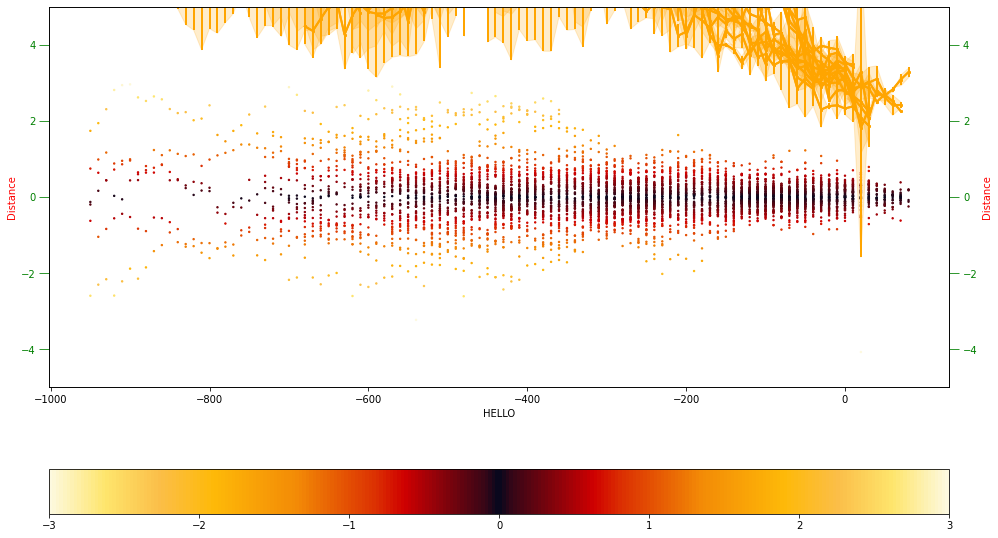

In [81]:
fig, ax = plt.subplots(figsize=(20, 10))
axes = [ax, ax.twinx()]
# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# Move the last y-axis spine over to the right by 20% of the width of the axes
# axes[-1].spines['right'].set_position(('axes', 1.2))

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
# axes[-1].set_frame_on(True)
# axes[-1].patch.set_visible(False)

ax.set_xlabel("HELLO")

distance_config["data"] = df_distance
plot_scatter(fig, axes[0], distance_config)
distance_config["data"] = df_length
plot_line(fig, axes[1], distance_config)
plot_errorbar(fig, ax, distance_config)
plot_fill(fig, axes[1], distance_config)
plt.show()

In [49]:
def plot_data(
    fig = fig,
    ax = ax,
    df: pd.DataFrame = df_distance,
    means: pd.Series = distance_means,
    means_error: pd.Series = distance_stds,
    means_color: str = "green",
    error_color: str = "red",
    scatter_size: float = 2.0,
    border_color: str = 'black',
    means_size: float = 2.0,
    means_error_size: float = 2.0,
    scatter_cmap: LinearSegmentedColormap = distance_cmap,
    show_colorbar: bool = True,
    ylim: Tuple[float, float] = (-5, 5),
    ylabel: str = "Distance",
    ylabel_size: float = 10.0,
    yticks_size: float = 10.0,
    scattter_marker: str = 'o',
    yticks_color: str = "green"
) -> pyplot:

    # distance
    if df_distance is not None:
        y = df_distance.index
        for i in range(len(df_distance.columns)):
            x = df_distance[df_distance.columns[i]]
            sc = ax.scatter(
                y,
                x,
                c=x,
                label=df_distance.columns[i],
                cmap=distance_cmap,
                marker=marker,
                s=d_size,
                vmin=distance_min,
                vmax=distance_max,
                edgecolors=d_border,
            )
        # means & std
        if distance_means is not None and distance_stds is not None:
            ax.errorbar(
                df_distance.index,
                distance_means,
                yerr=distance_stds,
                linewidth=d_means_size,
                color=d_line_color,
                elinewidth=d_err_size,
                ecolor=d_error_color,
            )
        elif distance_means is not None:
            ax.plot(
                df_distance.index,
                distance_means,
                linewidth=d_means_size,
                color=d_line_color,
            )


#     ax.ylabel(ylabel, size=ylabel_size)
    ax.set_ylabel(ylabel, size=ylabel_size, color=d_line_color)
    ax.tick_params(axis='y', colors=d_line_color, size=yticks_size)
    ax.set_ylim(ylim)

    if show_colorbar:
        fig.colorbar(sc)

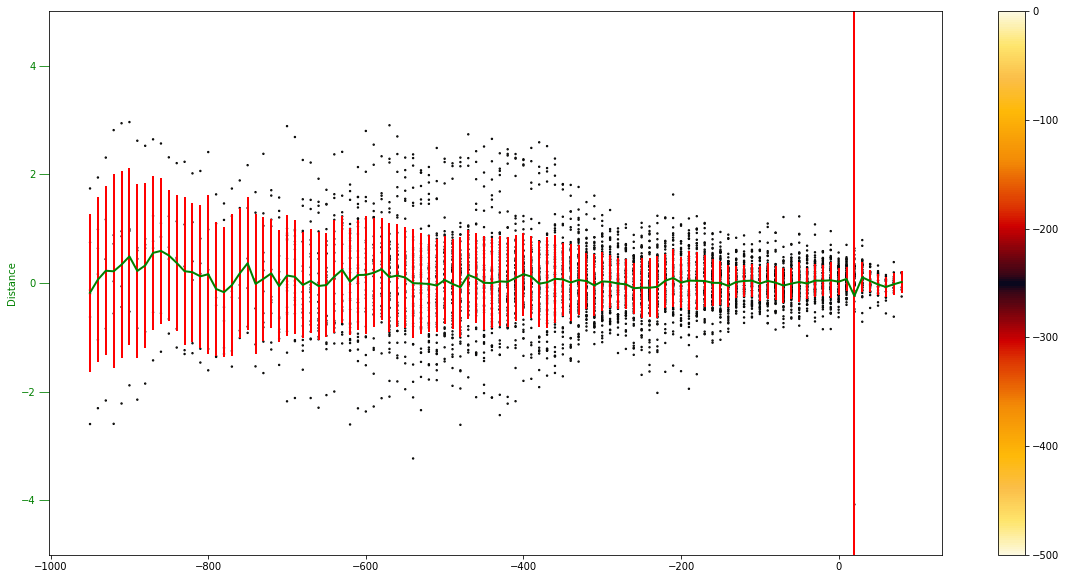

In [50]:
fig, ax = plt.subplots(figsize=(20, 10))
plot_distance(fig, ax)
plt.show()

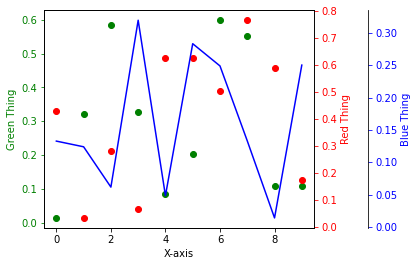

In [37]:
import matplotlib.pyplot as plt
import numpy as np
# To make things reproducible...
np.random.seed(1977)

fig, ax = plt.subplots()

def test(fig, ax):
    # Twin the x-axis twice to make independent y-axes.
    axes = [ax, ax.twinx(), ax.twinx()]

    # Make some space on the right side for the extra y-axis.
    fig.subplots_adjust(right=0.75)

    # Move the last y-axis spine over to the right by 20% of the width of the axes
    axes[-1].spines['right'].set_position(('axes', 1.2))

    # To make the border of the right-most axis visible, we need to turn the frame
    # on. This hides the other plots, however, so we need to turn its fill off.
    axes[-1].set_frame_on(True)
    axes[-1].patch.set_visible(False)

    # And finally we get to plot things...
    colors = ('Green', 'Red', 'Blue')
    for ax, color in zip(axes, colors):
        data = np.random.random(1) * np.random.random(10)
        if color == "Blue":
            ax.plot(data, color=color)
        else:
            ax.plot(data, marker='o', linestyle='none', color=color)
        ax.set_ylabel('%s Thing' % color, color=color)
        ax.tick_params(axis='y', colors=color)
    axes[0].set_xlabel('X-axis')

test(fig, ax)
plt.show()